<a href="https://colab.research.google.com/github/Phuc0417/AI_2023/blob/main/W12_MTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mtcnn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN


3/3 [==============================] - 0s 24ms/step


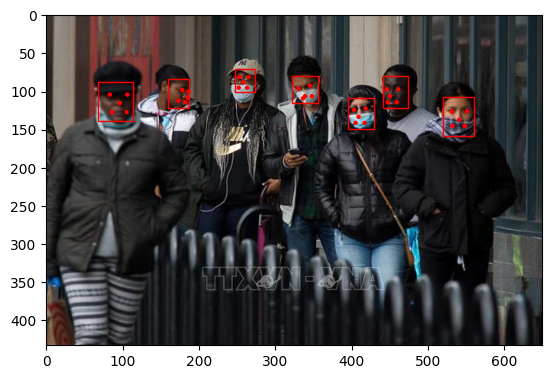

In [ ]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN

filename = '/content/drive/MyDrive/W12/anhnhieunguoi_deokhautrang.jpg'
img = plt.imread(filename)
plt.imshow(img)

detector = MTCNN()
faces = detector.detect_faces(img)

plt.imshow(img)
ax = plt.gca()

for face in faces:
  x,y,width,height = face['box']
  red = plt.Rectangle((x,y),width,height,fill=False,color='red')
  ax.add_patch(red)
  for key,value in face['keypoints'].items():
    dot = plt.Circle(value,radius = 2,color='red')
    ax.add_patch(dot)
plt.show()


In [ ]:
#gán nhãn từng khuôn mặt được phát hiện
import matplotlib.pyplot as plt
from mtcnn import MTCNN
def draw_faces(filename,result_list):
  data = plt.imread(filename)
  for i in range(len(result_list)):
    x1,y1,wight,height = result_list[i]['box']
    x2,y2 = x1+wight,y1+height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
  plt.show()

In [ ]:
filename = '/content/drive/MyDrive/W12/anhnhieunguoi_deokhautrang.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)


3/3 [==============================] - 0s 48ms/step


1/1 [==============================] - 1s 1s/step
Predicted: [('n07734744', 'mushroom', 0.51978856), ('n13044778', 'earthstar', 0.32096928), ('n13052670', 'hen-of-the-woods', 0.06301885)]


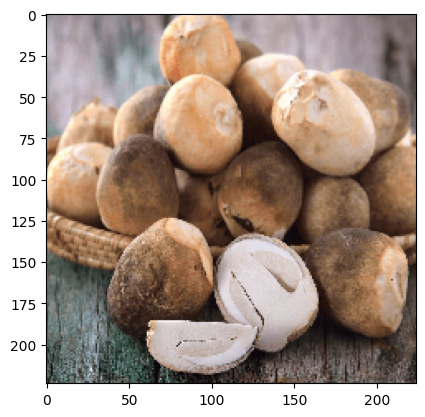

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/drive/MyDrive/W12/nam.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])
plt.imshow(img)

1/1 [==============================] - 1s 736ms/step
Pembroke: 88.11%
Cardigan: 3.32%
golden_retriever: 1.27%
Saint_Bernard: 0.34%
collie: 0.29%


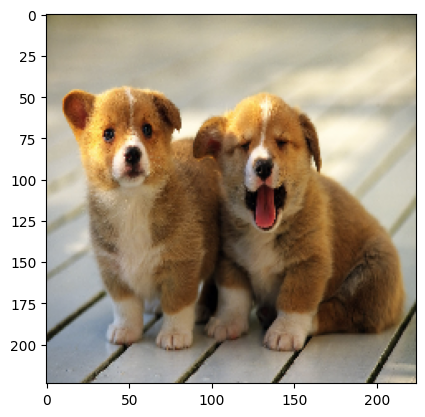

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# Load pre-trained VGG16 model
model = VGG16(weights='imagenet')

# Load and preprocess image
img_path = '/content/drive/MyDrive/W12/cho.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict image class
predictions = model.predict(x)
decoded_predictions = decode_predictions(predictions, top=5)[0]

# Print the top 5 predicted classes
for pred in decoded_predictions:
    print(f"{pred[1]}: {pred[2]*100:.2f}%")
plt.imshow(img)

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = '/content/drive/MyDrive/W12/cho.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)


1/1 [==============================] - 1s 743ms/step


In [ ]:
pip install youtube-search

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from youtube_search import YoutubeSearch
import webbrowser
mysong = input('nhập tên bài hát ')
result = YoutubeSearch(mysong,max_results=10).to_dict()
print(result)
print(result[0]['url_suffix'])
url = 'http://www.youtube.com'+result[0]['url_suffix']
print(url)

#nếu dùng jupyter lap
webbrowser.open(url)
print('bài hát yêu thích của bạn đã được mở')

nhập tên bài hát bad liar
[{'id': 'I-QfPUz1es8', 'thumbnails': ['https://i.ytimg.com/vi/I-QfPUz1es8/hqdefault.jpg?sqp=-oaymwEjCOADEI4CSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLDCwucQLVo00rsD9tm25VbHhb5RWw'], 'title': 'Imagine Dragons - Bad Liar (Official Music Video)', 'long_desc': None, 'channel': 'ImagineDragons', 'duration': '4:44', 'views': '435,289,697 views', 'publish_time': '4 years ago', 'url_suffix': '/watch?v=I-QfPUz1es8&pp=ygUIYmFkIGxpYXI%3D'}, {'id': 'uEDhGX-UTeI', 'thumbnails': ['https://i.ytimg.com/vi/uEDhGX-UTeI/hq720.jpg?sqp=-oaymwEjCOgCEMoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLCopHlIru3Q3FLSGW5Mbjk7FQAQYQ', 'https://i.ytimg.com/vi/uEDhGX-UTeI/hq720.jpg?sqp=-oaymwEXCNAFEJQDSFryq4qpAwkIARUAAIhCGAE=&rs=AOn4CLBGZVxKtB4M65NyNpAAfHAG3NIImA'], 'title': 'Imagine Dragons - Bad Liar (Lyric Video)', 'long_desc': None, 'channel': 'ImagineDragons', 'duration': '4:22', 'views': '188,673,078 views', 'publish_time': '4 years ago', 'url_suffix': '/watch?v=uEDhGX-UTe

In [ ]:
from youtube_search import YoutubeSearch
import webbrowser
from openpyxl import Workbook
data = Workbook()
sheet = data.active
mysong = input('xin mời bạn chọn tên bài hát:')
print(mysong)
result = YoutubeSearch(mysong, max_results=10).to_dict()
print(result)
for i in range(10):
  print(result[i]['title'])
  print(result[i]['url_suffix'])
  url = 'http://www.youtube.com'+result[i]['url_suffix']
  print(url)
  sheet['A'+str(i+1)]=i+1
  sheet['B'+str(i+1)]=result[i]['title']
  sheet['C'+str(i+1)]=result[i]['url_suffix']
  sheet['D'+str(i+1)]=result[i]['views']
  #webbrowser.open(url)
data.save('UEH.xlsx')  

xin mời bạn chọn tên bài hát:aa
aa
[{'id': '_1aO4pCvxN0', 'thumbnails': ['https://i.ytimg.com/vi/_1aO4pCvxN0/hq720.jpg?sqp=-oaymwEjCOgCEMoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLDkwrp_73LPDyhP9y3ylRsmYOe1vQ', 'https://i.ytimg.com/vi/_1aO4pCvxN0/hq720.jpg?sqp=-oaymwEXCNAFEJQDSFryq4qpAwkIARUAAIhCGAE=&rs=AOn4CLBJ1hGv602JuIXzZdhbMjEDezkzfg'], 'title': 'Walker Hayes - AA (Official Video)', 'long_desc': None, 'channel': 'Walker Hayes', 'duration': '3:13', 'views': '17,414,920 views', 'publish_time': '11 months ago', 'url_suffix': '/watch?v=_1aO4pCvxN0&pp=ygUCYWE%3D'}, {'id': 'hp6T14iP2C4', 'thumbnails': ['https://i.ytimg.com/vi/hp6T14iP2C4/hq720.jpg?sqp=-oaymwEjCOgCEMoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLACp_8Qky8I2MCeZw0EroqhJDZKAw', 'https://i.ytimg.com/vi/hp6T14iP2C4/hq720.jpg?sqp=-oaymwEXCNAFEJQDSFryq4qpAwkIARUAAIhCGAE=&rs=AOn4CLCJNQOyAK5-tyola68g2UudsDRBUw'], 'title': 'Walker Hayes - AA (Lyric Video)', 'long_desc': None, 'channel': 'Walker Hayes', 'duration': '3